<a href="https://colab.research.google.com/github/ftmsadeghi/Convex-Optimization/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


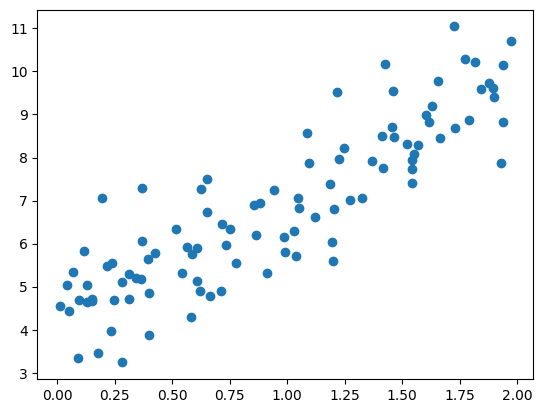

In [ ]:
plt.scatter(X, y)



---

> SKLEARN --> LinearRegression


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
a_sklearn = model.coef_[0][0]
b_sklearn = model.intercept_[0]
a_sklearn, b_sklearn

(2.7701133864384837, 4.215096157546747)


---

>   CVXPY




In [ ]:
import cvxpy as cp

In [ ]:
a = cp.Variable(1)
b = cp.Variable(1)
objective = cp.Minimize(cp.sum_squares(y - (a * X + b)))
problem = cp.Problem(objective)
problem.solve()


80.65845639670532

In [ ]:
a_cvxpy = a.value[0]
b_cvxpy = b.value[0]
a_cvxpy, b_cvxpy

(2.7701133864384833, 4.215096157546749)

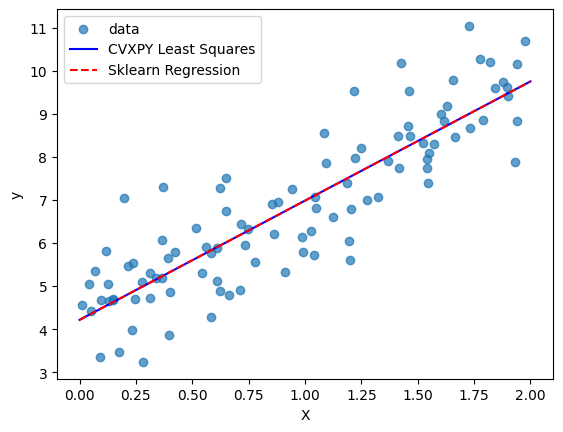

In [ ]:
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
y_sklearn_pred = a_sklearn * X_plot + b_sklearn
y_cvxpy_pred = a_cvxpy * X_plot + b_cvxpy

plt.scatter(X, y, label="data", alpha=0.7)
plt.plot(X_plot, y_cvxpy_pred, "b-", label="CVXPY Least Squares")

plt.plot(X_plot, y_sklearn_pred, "r--", label="Sklearn Regression")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()



---

> SCIPY --> stats



In [ ]:
from scipy import stats

In [ ]:
a_stats, b_stats, r, p, std_err = stats.linregress(X.flatten(), y.flatten())
a_stats, b_stats

(2.7701133864384846, 4.215096157546746)



---

$b = \bar{y} - a \bar{x}$ \\
$a = \frac{\sum xy - n\bar{x}\hat{y}}{\sum x^2 - n\bar{x}^2}$


In [ ]:
x_=np.mean(X)
y_=np.mean(y)

In [ ]:
n = len(X)
a = (sum(X*y) - n * (x_ * y_))/(sum(X**2) - n * (x_ ** 2))
b = y_ - a * x_

a, b

(array([2.77011339]), array([4.21509616]))



---



> Gradient descent



In [ ]:
X_b = np.c_[np.ones((100, 1)), X]


In [ ]:

learning_rate = 0.1
n_iterations = 1000
m = len(X_b)

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)

    theta = theta - learning_rate * gradients

print(theta)

[[4.21509609]
 [2.77011344]]




> torch gd



In [ ]:
import torch
import torch.nn as nn


In [ ]:
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()


In [ ]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
n_epochs = 2000


In [ ]:
for epoch in range(n_epochs):
    y_pred = model(X_tensor)

    loss = criterion(y_pred, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')



Epoch [100/2000], Loss: 0.8066
Epoch [200/2000], Loss: 0.8066
Epoch [300/2000], Loss: 0.8066
Epoch [400/2000], Loss: 0.8066
Epoch [500/2000], Loss: 0.8066
Epoch [600/2000], Loss: 0.8066
Epoch [700/2000], Loss: 0.8066
Epoch [800/2000], Loss: 0.8066
Epoch [900/2000], Loss: 0.8066
Epoch [1000/2000], Loss: 0.8066
Epoch [1100/2000], Loss: 0.8066
Epoch [1200/2000], Loss: 0.8066
Epoch [1300/2000], Loss: 0.8066
Epoch [1400/2000], Loss: 0.8066
Epoch [1500/2000], Loss: 0.8066
Epoch [1600/2000], Loss: 0.8066
Epoch [1700/2000], Loss: 0.8066
Epoch [1800/2000], Loss: 0.8066
Epoch [1900/2000], Loss: 0.8066
Epoch [2000/2000], Loss: 0.8066


linear.weight tensor([[2.7702]])
linear.bias tensor([4.2150])


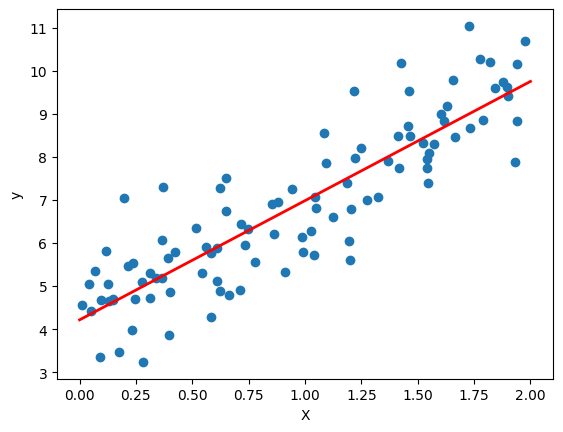

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

X_new = np.array([[0], [2]])
X_new_tensor = torch.from_numpy(X_new).float()
y_pred_tensor = model(X_new_tensor)
y_pred = y_pred_tensor.detach().numpy()

plt.scatter(X, y)

plt.plot(X_new, y_pred, "r-", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.show()




---


**diabetes datasets**



In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()


In [ ]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
diabetes.data.shape, diabetes.target.shape


((442, 10), (442,))

In [ ]:
X = diabetes.data

y = diabetes.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 2900.193628493482
Mean Absolute Error (MAE): 42.79409467959994
R² Score: 0.4526027629719195




---



> Machine Learning: Ridge Regression



Ridge regression is a regression technique that is quite similar to unadorned least squares linear regression: simply adding an l2 penalty on the parameters w to the objective function for linear regression yields the objective function for ridge regression.

Our goal is to find an assignment to w that minimizes the function

f(w) = ||Xw-Y||₂² + λ||w||₂²,

where λ is a hyperparameter and, as usual, X is the training data and Y the observations. In practice, we tune λ until we find a model that generalizes well to the test data.

Ridge regression is an example of a shrinkage method: compared to least squares, it shrinks the parameter estimates in the hopes of reducing variance, improving prediction accuracy, and aiding interpretation.

In this notebook, we show how to fit a ridge regression model using CVXPY, how to evaluate the model, and how to tune the hyper-parameter λ.


In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loss_fn(X, Y, w):
    return cp.pnorm(X @ w - Y, p=2)**2

def regularizer(w):
    return cp.pnorm(w, p=2)**2

def objective_fn(X, Y, w, lambd):
    return loss_fn(X, Y, w) + lambd * regularizer(w)

def mse(X, Y, w):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, w).value

In [ ]:
def generate_data(m=100, n=20, sigma=5):
    "Generates data matrix X and observations Y."
    np.random.seed(1)
    beta_star = np.random.randn(n)
    # Generate an ill-conditioned data matrix
    X = np.random.randn(m, n)
    # Corrupt the observations with additive Gaussian noise
    Y = X.dot(beta_star) + np.random.normal(0, sigma, size=m)
    return X, Y

m = 100
n = 20
sigma = 5

X, Y = generate_data(m, n, sigma)
X_train = X[:50, :]
Y_train = Y[:50]
X_test = X[50:, :]
Y_test = Y[50:]

In [ ]:
w = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, Y_train, w, lambd)))

lambd_values = np.logspace(-2, 3, 50)
train_errors = []
test_errors = []
w_values = []
for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, Y_train, w))
    test_errors.append(mse(X_test, Y_test, w))
    w_values.append(w.value)

/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


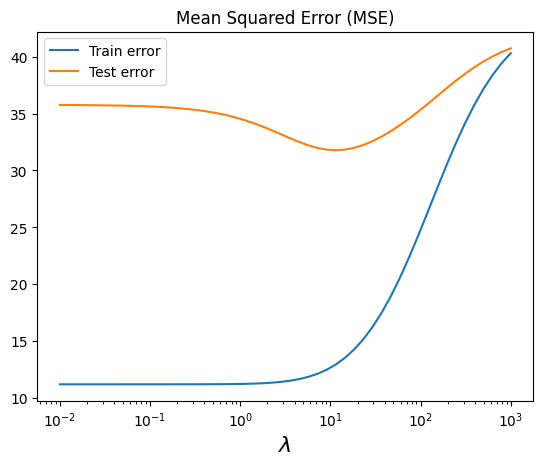

In [ ]:
def plot_train_test_errors(train_errors, test_errors, lambd_values):
    plt.plot(lambd_values, train_errors, label="Train error")
    plt.plot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

plot_train_test_errors(train_errors, test_errors, lambd_values)

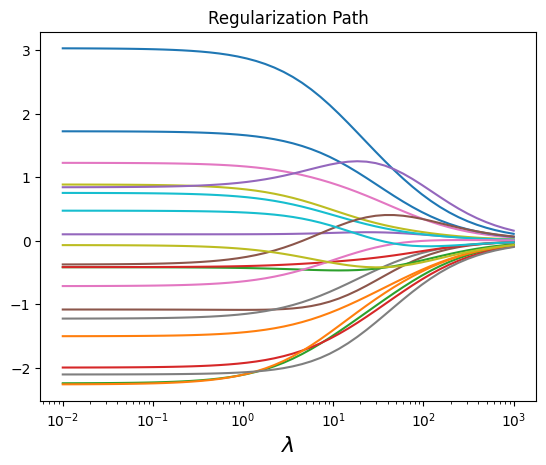

In [ ]:
def plot_regularization_path(lambd_values, w_values):
    num_coeffs = len(w_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in w_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, w_values)